In [14]:
import pandas as pd 
import numpy as np
from sklearn import tree 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder 


In [15]:
# Load data 

train_data = pd.read_csv("https://machine-failure-data-20230822-craiguo.s3.us-west-2.amazonaws.com/train.csv")

train_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [16]:
# Load data 
test_data = pd.read_csv("https://machine-failure-data-20230822-craiguo.s3.us-west-2.amazonaws.com/test.csv")

test_data.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [35]:
X = train_data.drop(columns=["id", "Product ID", "Machine failure"])
y = train_data["Machine failure"]

X = pd.get_dummies(X)

In [36]:
# Split 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state= 50)


In [37]:
# Create a Decision Tree classifier
tree = DecisionTreeClassifier()



In [38]:
# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [None, 3, 5, 7, 9, 11, 13, 15, 17, 19]}



In [40]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5, verbose = 3)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....................max_depth=None;, score=0.991 total time=   1.0s
[CV 2/5] END ....................max_depth=None;, score=0.992 total time=   0.9s
[CV 3/5] END ....................max_depth=None;, score=0.992 total time=   1.0s
[CV 4/5] END ....................max_depth=None;, score=0.992 total time=   0.9s
[CV 5/5] END ....................max_depth=None;, score=0.992 total time=   1.0s
[CV 1/5] END .......................max_depth=3;, score=0.995 total time=   0.1s
[CV 2/5] END .......................max_depth=3;, score=0.995 total time=   0.1s
[CV 3/5] END .......................max_depth=3;, score=0.995 total time=   0.1s
[CV 4/5] END .......................max_depth=3;, score=0.994 total time=   0.1s
[CV 5/5] END .......................max_depth=3;, score=0.996 total time=   0.1s
[CV 1/5] END .......................max_depth=5;, score=0.996 total time=   0.2s
[CV 2/5] END .......................max_depth=5;

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
             verbose=3)

In [42]:
best_model = grid_search.best_estimator_

In [44]:
y_pred = best_model.predict(X_val)

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[33584,     4],
       [  143,   377]], dtype=int64)

IndexError: list index out of range

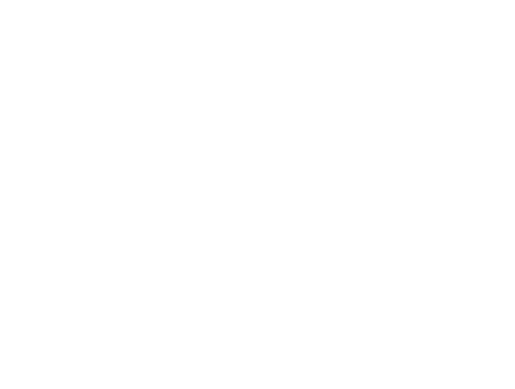

In [61]:
plot_tree(best_model, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title(f'Best Decision Tree (Max Depth = {best_tree.max_depth}), Accuracy: {accuracy:.2f}')

In [58]:
plt.show()